# Aslam Fathin Rahmat
# 19/443568/TK/48764

#### Tugas Artificial Intelligence
#### Clustering

## Inisialisasi

In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

## Import data set

Referensi data : https://archive.ics.uci.edu/ml/datasets/Automobile

In [706]:
data_set = pd.read_csv ('D:\Studi\Perkuliahan\TE sem 7\AI\Automobile_imports-85.csv')
pd.set_option('display.max_rows', 10)
data_set

,symboling,normalized-losses,maker,fuel-type,aspiration,num-of-doors,body-type,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Data di atas merupakan data impor 205 kendaraan truk dan mobil di Amerika Serikat pada 1985.
Data tersebut masih berupa campuran antara mobil dan truk.
Oleh sebab itu, untuk mengelompokkan kendaraan truk dan mobil bisa dilihat dari ukuran mesin dan daya yang dihasilkan oleh mesinnya (horsepower).

## Memisahkan data yang akan diambil

In [707]:
data_frame = data_set[['engine-size','horsepower']]
data_frame

,engine-size,horsepower
0,130,111
1,130,111
2,152,154
3,109,102
4,136,115
...,...,...
200,141,114
201,141,160
202,173,134
203,145,106


## Sorting data

In [708]:
#sorting data berdasarkan ukuran mesin
data_frame = data_frame.sort_values('engine-size', ascending = True) 
data_frame

,engine-size,horsepower
18,61,48
57,70,101
55,70,101
56,70,101
32,79,60
...,...,...
48,258,176
47,258,176
74,304,184
73,308,184


## Perbaikan data

In [709]:
data_frame.loc[data_frame['horsepower'] =='?']

,engine-size,horsepower
130,132,?
131,132,?


Terdapat data yang tidak valid di kolom 'horsepower'

In [710]:
#menghilangkan data yang tidak diperlukan
data_frame.drop([130, 131], axis = 0, inplace = True) 

#indexing ulang
data_frame.index = range(203)

#mengubah tipe data 'horsepower' menjadi integer
data_frame['horsepower'] = pd.to_numeric(data_frame['horsepower'])
data_frame

,engine-size,horsepower
0,61,48
1,70,101
2,70,101
3,70,101
4,79,60
...,...,...
198,258,176
199,258,176
200,304,184
201,308,184


## Visualisasi data

<AxesSubplot: xlabel='engine-size', ylabel='horsepower'>

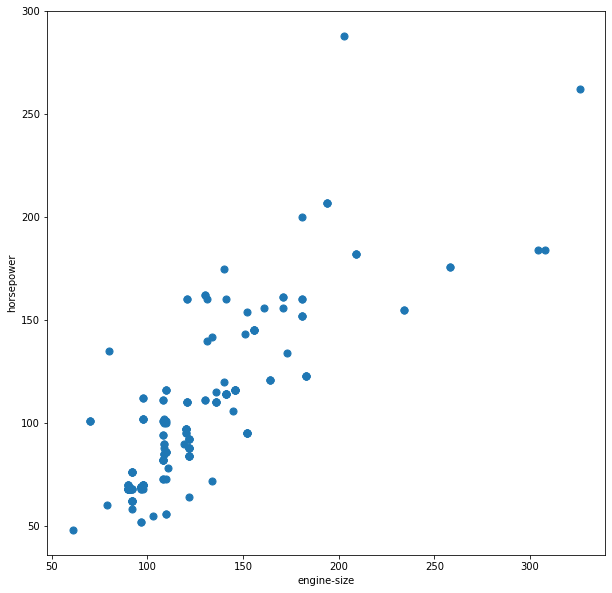

In [711]:
data_frame.plot.scatter(figsize = (10, 10), x = 'engine-size', y = 'horsepower', s=50)

## Pembuatan K-Means Clustering

#### Algoritma K_Means Clustering
1. Tentukan jumlah cluster yang diperlukan
2. Pilih nilai awal untuk centroid
3. Hitung jarak antara centroid dengan setiap titik data
4. Kelompokkan titik data pada cluster dengan centroid terdekat
5. Hitung kembali centroid yang baru
6. Ulangi langkah 3 hingga 5 sampai kriteria berhenti terpenuhi

Kriteria berhenti :
- perubahan centroid tidak signifikan
- jumlah iterasi maksimum tercapai
- faktor lain.

In [712]:
#membuat centroid

K = 2 #jumlah cluster
iteration = 20 #jumlah iterasi
control_val = 0.000001 #nilai kontrol
data_array = data_frame.values
centroids = np.random.randint(low = min(data_array[:,0]), high = max(data_array[:,0]), size = (K,2)) #centroid random

print('minimum engine size = ', min(data_array[:,0]))
print('maximum engine size = ', max(data_array[:,0]))

centroids = centroids.astype(np.float)
centroids_ori = centroids

print(centroids)
#print(np.size(centroids,0))

minimum engine size =  61
maximum engine size =  326
[[ 67. 311.]
 [ 90. 267.]]


In [713]:
new_centroid = np.zeros((np.size(centroids,0),2))
count = np.zeros((iteration,1))
clust_dist = np.zeros((np.size(centroids,0),1))
cluster = np.zeros(data_array.shape[0])

#kalkulasi jarak dan cluster
for loop in range(0,iteration):
    for dist in range(0,np.size(data_array,0)):
        min_dist = float('inf')
        for row in range(0,K):
            distance = np.sqrt(np.sum((centroids[row] - data_array[dist])**2))
            if min_dist > distance:
                min_dist = distance
                cluster[dist] = row
                
    
    #input nilai centroid yang baru
    new_centroid = pd.DataFrame(data_array).groupby(by = cluster).mean().values
    centroids = new_centroid

    #iteration dan bug control
    count[loop] = np.sum(new_centroid)
    control = abs(((count[loop] - count[loop-1])/count[loop])*100)
    if control < control_val:
        print('control')
        break
    elif np.size(centroids,0) < K:
        print('bug')
        break
        
print('final centroid = \n',centroids,'\n')
print('cluster array = \n', cluster)       
print('jumlah iterasi = ', loop,'oke')    

bug
final centroid = 
 [[126.85714286 104.25615764]] 

cluster array = 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
jumlah iterasi =  0 oke


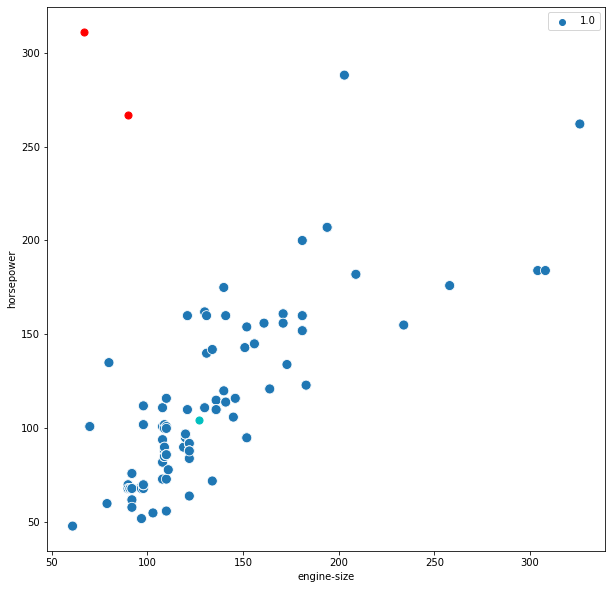

In [714]:
#Visualisasi hasil clustering
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_frame, x='engine-size', y='horsepower', hue=cluster, s=100)
plt.scatter(x=centroids[:,0],y=centroids[:,1],s=50,c='c')
plt.scatter(x=centroids_ori[:,0],y=centroids_ori[:,1],s=50,c='r')

Sumber Referensi : 
- https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
- https://www.gatevidyalay.com/tag/k-means-clustering-flowchart/